<br><br><center><h1 style="font-size:3em;color:#2467C0">Feature Selection</h1></center>
<br>
<table>
<tr>
<td><img src="feature_selection.jpg" align="middle" style="width:300px;height:200px;"/></td>
<td>
특성 선택 및 차원 축소를 실습해본다.
</td>
</tr>
</table>

### 특성 자동 선택
#### 단변량 통계

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

# 고정된 난수를 발생시킴
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise]) # horizontal stack

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7fc10c2d0ee0>],
 <a list of 1 Text major ticklabel objects>)

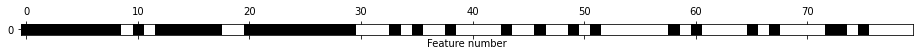

In [79]:
mask = select.get_support()
print(mask)

# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature number")
plt.yticks([0])

In [80]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.919
선택된 일부 특성을 사용한 점수: 0.912


#### 모델 기반 특성 선택

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [37]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x7fc10bd1cb50>],
 <a list of 1 Text major ticklabel objects>)

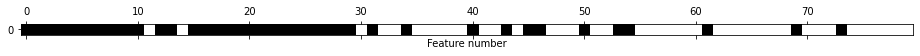

In [38]:
mask = select.get_support()

# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature number")
plt.yticks([0])

In [39]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


#### 반복적 특성 선택

([<matplotlib.axis.YTick at 0x7fc10c23ba00>],
 <a list of 1 Text major ticklabel objects>)

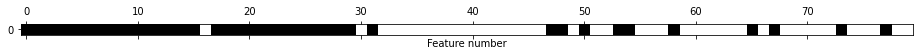

In [40]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

# 선택된 특성을 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature number")
plt.yticks([0])

In [41]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.930


#### 차원 축소

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [45]:
score = LogisticRegression().fit(X_train_pca, y_train).score(X_test_pca, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.933
